# 뉴스 카테고리 다중분류

1. 로이터 뉴스 데이터 이해하기
2. F1-score와 confusion matrix 출력해보기
3. 여러 머신러닝 모델에 대해서 성능 비교해보기
4. 단어 수에 따른 성능 비교해보기

로이터 뉴스 데이터는 총 46개의 클래스가 있는 데이터로 저번 프로젝트에서 수행했던 감정 분류 모델이 이진 분류(0과 1로의 분류)였다면 이번 프로젝트는 `다중 분류`이다.

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

/home/aiffel-dj57/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel-dj57/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


num_words=10000  : 빈도수를 기준으로 상위 데이터를 기준으로 몇번째 데이터까지 불러올 것인지를 결정하는 수치. 하지만 10000이라 설정한다고 그를 웃도는 수치를 가진 데이터들이 사라지는 것은 아니다. 이들은 <unk>로 매핑된다. 이러한 문제를 oov라 부른다
    

In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])
#실제 데이터가 아니라 숫자 시퀀스가 출력이 된다.(이미 전처리가 된 상태의 데이터)

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
print(y_train[0])
print(y_test[0])
#레이블 확인

3
3


In [6]:
#클래스의 수
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))
# 레이블은 숫자 0부터 시작되므로, 모든 레이블 중 최댓값을 구하고 1을 더하면 현재 클래스의 개수를 볼 수 있어요.
#클래스의 수가 총 46이나 되므로 어떤 데이터가 어떤 클래스에 속하는지 맞추는 작업이 꽤 까다로울 것 같아요

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


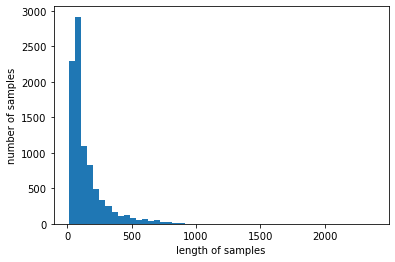

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train))) #x_train중 가장 긴 데이터를 가져와서 뽑아봅니다
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train))) #map 함수 여러번 봤지만 아직 안와닿는다 찾아봐야겠다

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


/home/aiffel-dj57/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

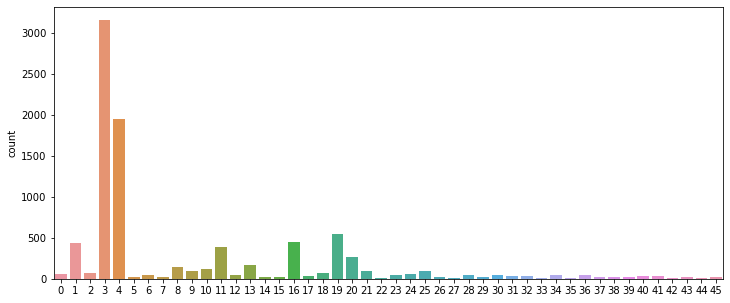

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)
#각 클래스별 분포를 살펴봅니다
#모델의 성능에 영향을 줄 수 있는 요소이기 때문에 실제로 모든 클래스가 다 존재는 하는 것인지, 또 어떤 클래스가 유독 많은지, 이런 것들을 사전에 확인해 보아야 합니다.
#plt subplot()과 #plt subplots의 차이. 전자는 모든 플롯을 각각 설정해줘야 하지만 후자는 한꺼번에 설정해줄 수 있다. 많은 그래프를 그릴때 유용하다
#참고 : https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html

In [9]:
# 3번과 4번 클래스가 데이터의 상당수를 차지하는 모습을 확인할 수 있다. 이런식으로 데이터의 분포를 확인하는 것은 중요하다.
unique_elements, counts_elements = np.unique(y_train, return_counts=True)# return_counts. 값이 True면 중복 되지 않는 요소들이 입력 배열에 나타난 회 수를 리턴
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [10]:
#로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공합니다. 이를 word_index로 저장해보겠습니다.
word_index = reuters.get_word_index(path="reuters_word_index.json")


In [11]:
print(word_index['the'])
print(word_index['it'])

1
13


`check`
뉴스 데이터 안에서 단어 'the'는 사실 1번이 아니라 4번 단어입니다. 그리고 단어 'it'은 사실 13번 단어가 아니라 16번 단어입니다. 다른 단어들도 마찬가지로 word_index에 입력으로 했을 때, 얻는 숫자보다는 +3을 한 숫자가 원래 고유한 숫자입니다. 이건 로이터 뉴스 데이터가 정의한 일종의 약속입니다.   

**그렇기 때문에 word_index에서 index_word를 만들 때, 각 정수에 +3을 해주어야 합니다.**

In [12]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [13]:
print(index_to_word[4]) #3을 더해준 index에 매핑된 단어들이 제대로 출력이되는지 확인해본다
print(index_to_word[16])


the
it


In [14]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token #여기 코드이해가 잘 안가는데 조금있다가 다시 보자
#참고 : https://www.daleseo.com/python-enumerate/  
#enumerate를 활용하면 index와 원소를 같이 얻을 수 있다.

In [15]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [16]:
print(' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]])) #join 함수는 매개변수로 들어온 리스트에 있는 요소 하나하나를 합쳐서 하나의 문자열로 바꾸어 반환하는 함수입니다.


the transaction is expected to be completed


`[4, 12000, 23, 133, 6, 30, 515]`라는 정수 시퀀스가 있을 때      
실제로 로드한 데이터에는 `[4, 1, 23, 133, 6, 30, 515]`라 출력된다.     
정수 번호가 10000이 넘는 단어들은 1로 변환되어 로드되기 때문

In [17]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [18]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded


In [19]:
x_train[:5]


['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [20]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

# 벡터화하기(DTM, TF-IDF)
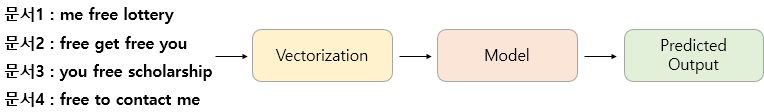



## 단어 빈도를 이용한 벡터화 

**DTM(Document-Term Matrix)** 는 여러 문서의 BOW를 하나의 행렬로 구현한 것. 각 문서에 등장한 빈도수를 하나의 행렬로 만들어 사용한다. 

EXAMPLE

```python
문서 1: Intelligent applications creates intelligent business processes
문서 2: Bots are intelligent applications
문서 3: I do business intelligence
```

각 행은 문서, 각 열은 단어의 빈도수를 나타낸다.

하지만 다수의 다큐먼트로 행렬을 구성했을 때 단어의 공백이 0으로 채워지기 때문에 행의 많은 칸들이 0으로 구성되게 된다.

**문서 벡터(document vector) : 행**

**단어 벡터(word vector) : 열**

문서의 수가 많아지면 통합 단어장의 크기도 커지기 때문에 문서 벡터와 단어 벡터의 대부분이 0이 되는 성질을 가지고 있다.



## DTM 한계점

DTM 성질. DTM은 bag of words기반으로 문서를 비교할 수 있는 행렬

**한계점**                                                                                                                                                     

- 문서의 수와 늘어날 수록 0의 값을 가지는 행이 늘어남 ⇒ 공간적 낭비 ⇒ 차원의 저주 발생
- 단어의 빈도에만 집중하기 때문에 생기는 문제. 정관사 the나 a 등은 대부분의 문서에 많은 빈도로 등장한다. 하지만 정관사의 비중이 높다고 해서 문서의 유사도가 높다고는 할 수 없다. 그렇기 때문에 중요한 단어와 중요하지 않은 단어에 가중치를 주는 방식이 등장한다.

### 단어 빈도를 이용한 벡터화 (5) TF-IDF

- TF-IDF는 단어의 중요도를 계산하여 가중치를 부여한다.
- TF-IDF는 모든 문서에 등장하는 단어는 중요도가 낮다고 판단하고, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단한다.
- 중요도가 낮으며 모든 문서에 등장하는 문서들이 노이즈화되는 것을 막음

KEYWORD : 단어의 빈도, 문서의 빈도의 역수

TF-IDF가 항상 DTM보다 성능이 월등한 것은 아니다. 우선 DTM을 구축한 후 TF-IDF 가중치를 부여하는게 필요하다.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [22]:
#Document Term Matrix, DTM은 사이킷런의 CountVectorizer()를 통해서 생성할 수 있습니다
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


로이터 뉴스의 다큐먼트 수는 8,982개이기 때문에 DTM행렬의 행 또한 8982의 shape를 가진다
데이터를 로드할 때, num_words=10,000이라는 값을 사용했음에도 DTM 열의 개수는 이보다 현저하게 적은 9,670개밖에 되지 않는 이유!
!**DTM은 불필요하다고 판단하는 토큰들을 자체적으로 제거한다**



In [23]:
#TF-IDF Matrix는 사이킷런의 TfidfTransformer()를 통해서 생성할 수 있습니다
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


# 나이브 베이즈 분류기

In [24]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [25]:
#나이브 베이즈 분류기는 사이킷런의 MultinomialNB()를 통해 사용할 수 있습니다
mod = MultinomialNB()
mod.fit(tfidfv, y_train)


MultinomialNB()

In [26]:
#테스트 데이터에 대한 정확도를 측정하기 위해서는 훈련 데이터와 동일한 전처리를 거쳐야 합니다. 다시 말해 테스트 데이터도 TF-IDF 행렬로 변환해 주어야 합니다. 그리고 해당 행렬과 predict() 함수를 통해 예측값을 얻어 정확도를 측정합니다.

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교


정확도: 0.6567230632235085


In [27]:
x_test[3] #나이브 베이즈 분류기가 임의의 샘플을 확인하는지 체크

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [28]:
y_test[3] #데이터 3의 레이블을 확인


4

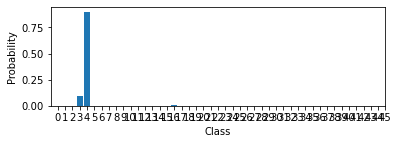

In [29]:
plt.subplot(211)
plt.rcParams["figure.figsize"] = (10,10)
plt.bar(mod.classes_, mod.predict_proba(tfidfv_test[3])[0])
plt.xlim(-1, 21)
plt.xticks(mod.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()
#이 샘플의 레이블은 4네요. 과연 모델은 제대로 예측하고 있는지 그리고 어느 정도의 확신을 가지고 판단하는지 모델이 결정한 확률을 그래프로 시각화해봅시다.

In [30]:
mod.predict(tfidfv_test[3]) #90퍼 확률로 예측했다

array([4])

#  F1-Score, Confusion Matrix

기계학습 모델과 패턴의 분류 성능 평가에 사용되는 지표들을 정리.

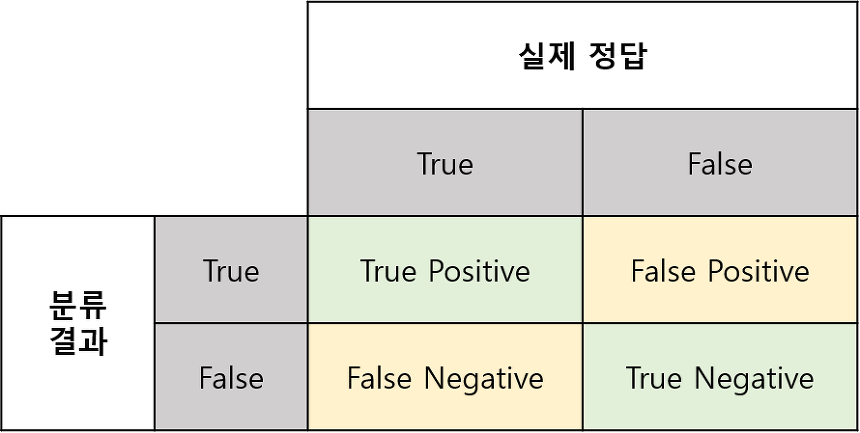
- True Positive(TP) : 실제로 정답인 값을 정답이라 예측
- False Positive(FP) : 실제로는 오답인 값을 정답이라 예측
- True Negative(TN) : 실제로 오답인 값을 오답이라 예측
- False Negativa(FN) : 실제로 정답인 값을 오답이라 예측

# Precision, Recall and acuracy
### Precision(정밀도)
모델이 true라 분류한 것들 중 실제 true의 비율.
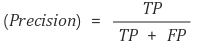
날씨 예측 모델이 날씨가 맑다 예측했을 때 실제로 날이 맑을 확률

### Recall(재현율)
실제 True인 것 중에서 모델이 True라고 예측한 것의 비율.
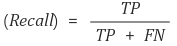
실제 날씨가 맑은 날 중 모델이 날이 맑다 예측할 확률


 Precision은 모델의 입장에서, 그리고 Recall은 실제 정답(data)의 입장에서 정답을 정답이라고 맞춘 경우를 바라보고 있습니다. 
 
 
 
 
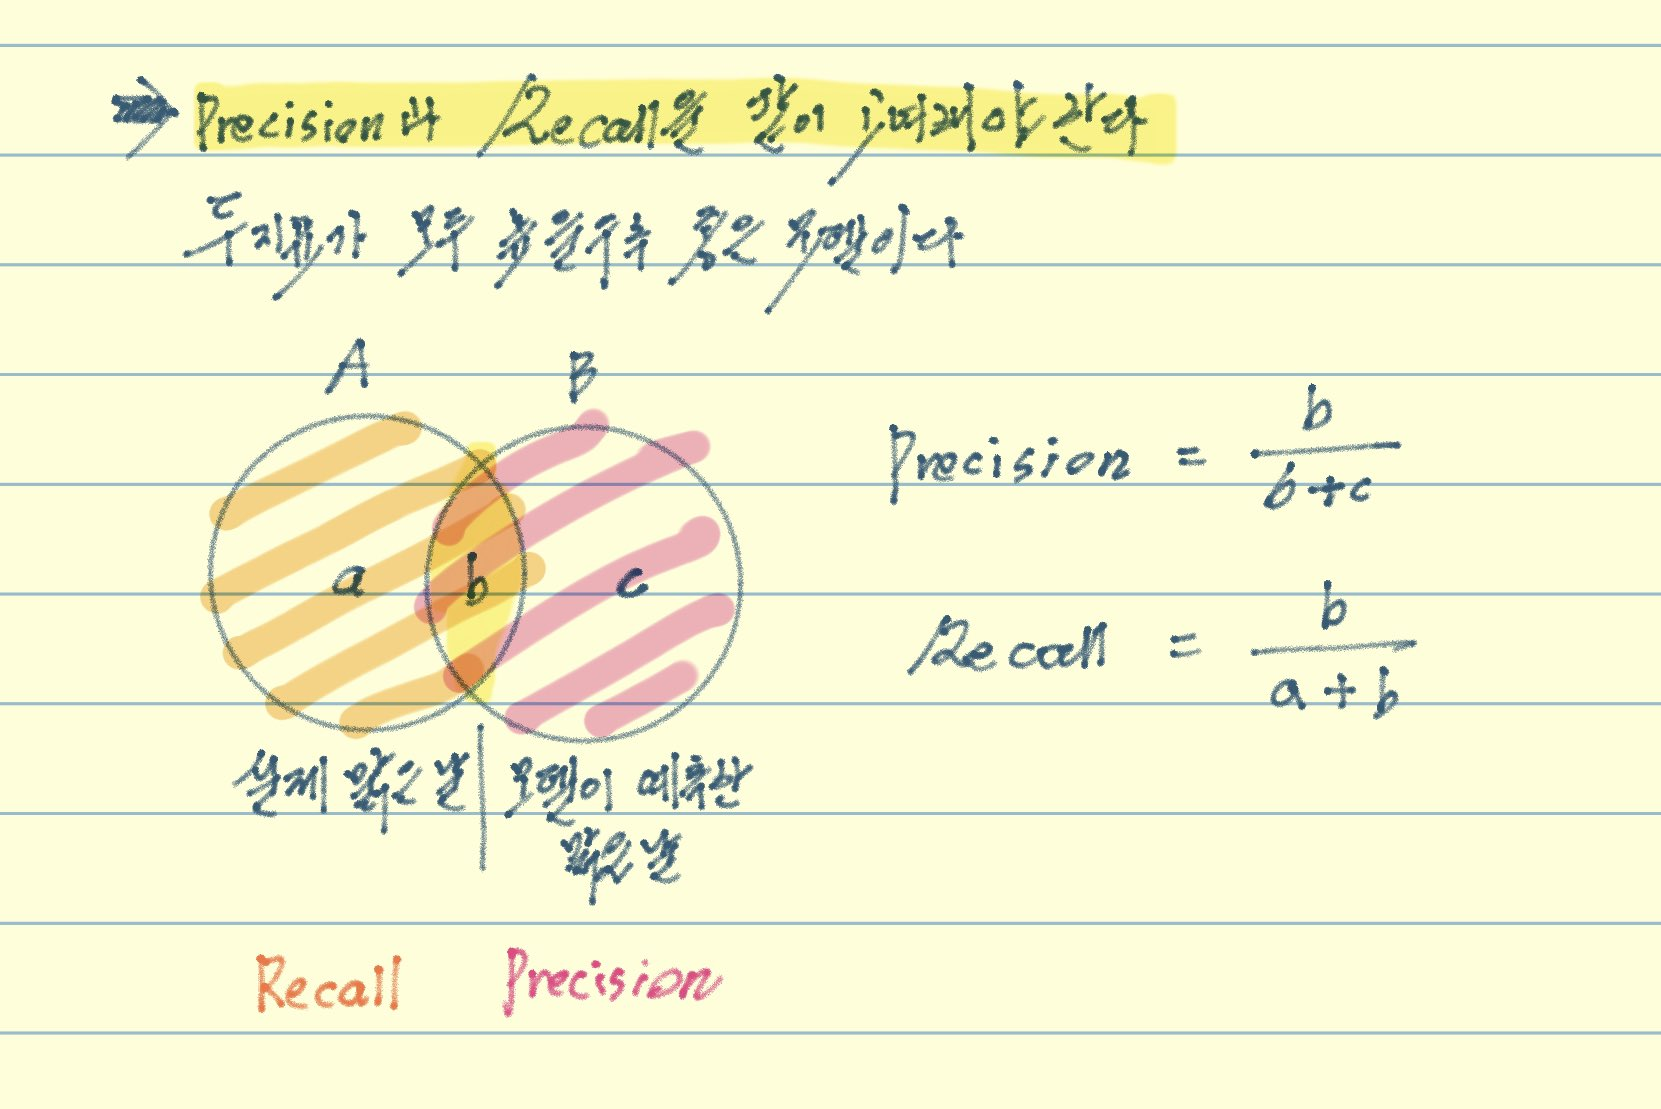 
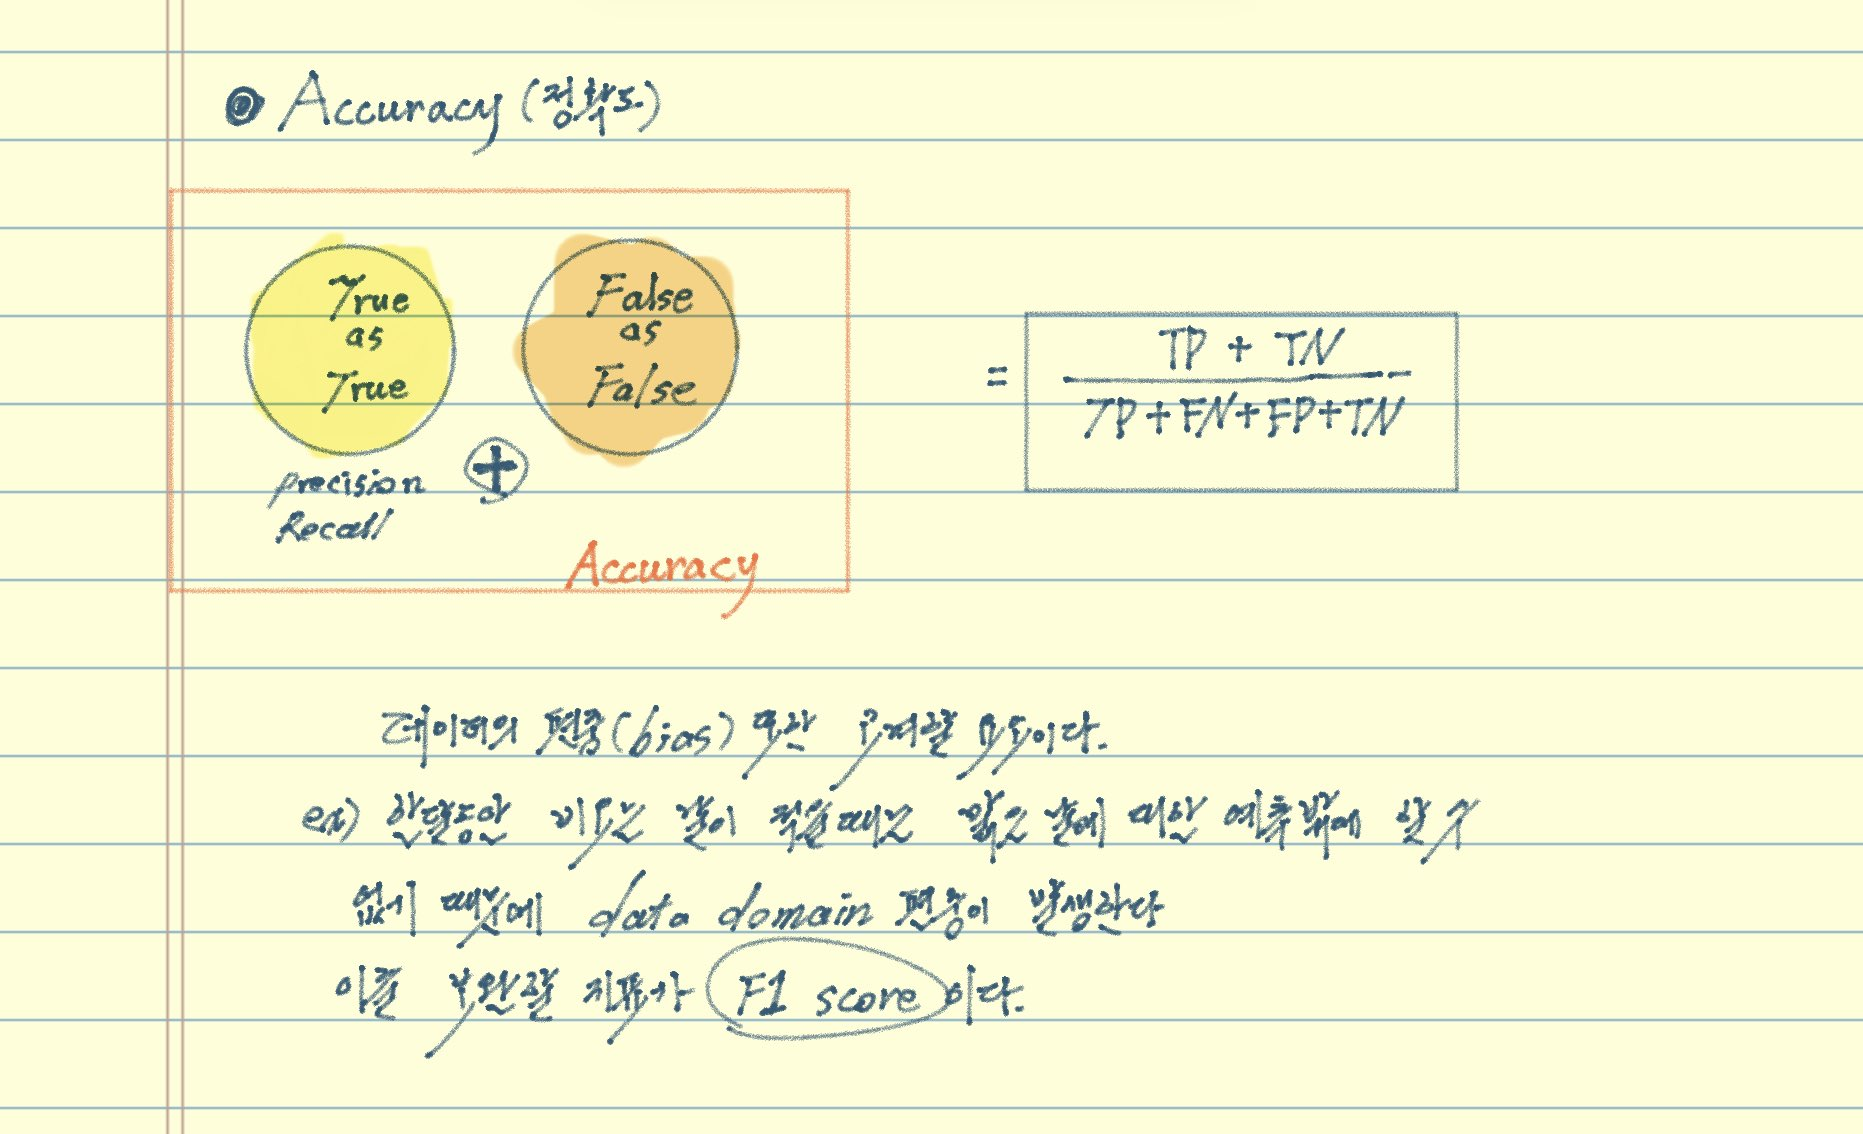
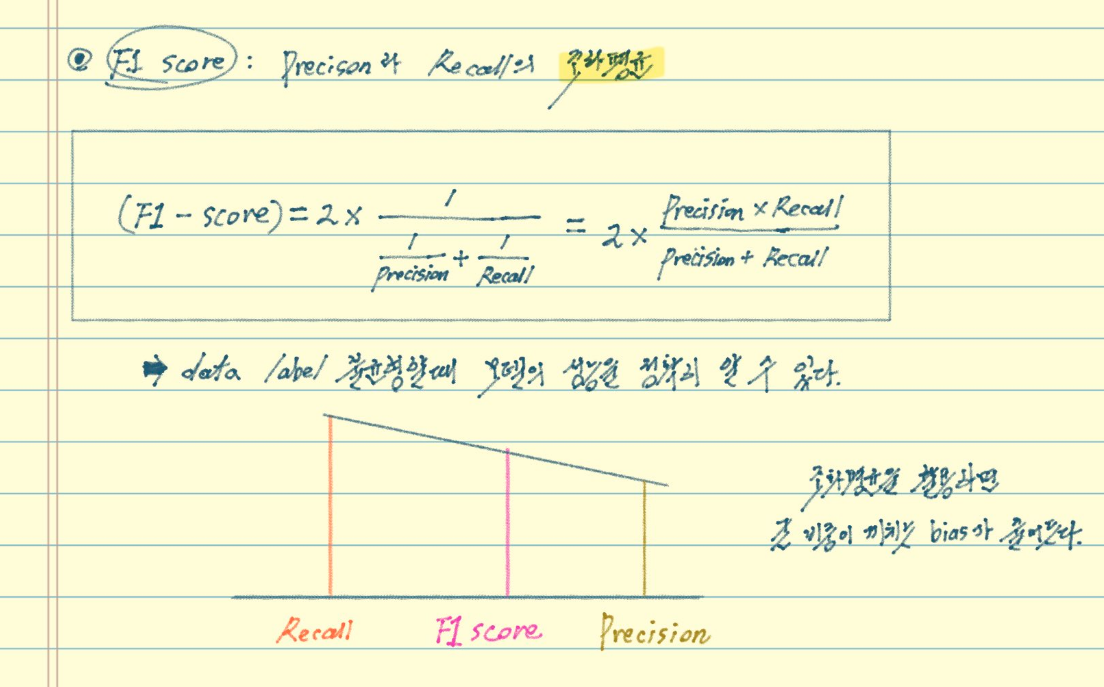 
https://sumniya.tistory.com/26 

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [33]:
print(classification_report(y_test, mod.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

/home/aiffel-dj57/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj57/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj57/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [34]:
# confusion matrix 시각화
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(15,15))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

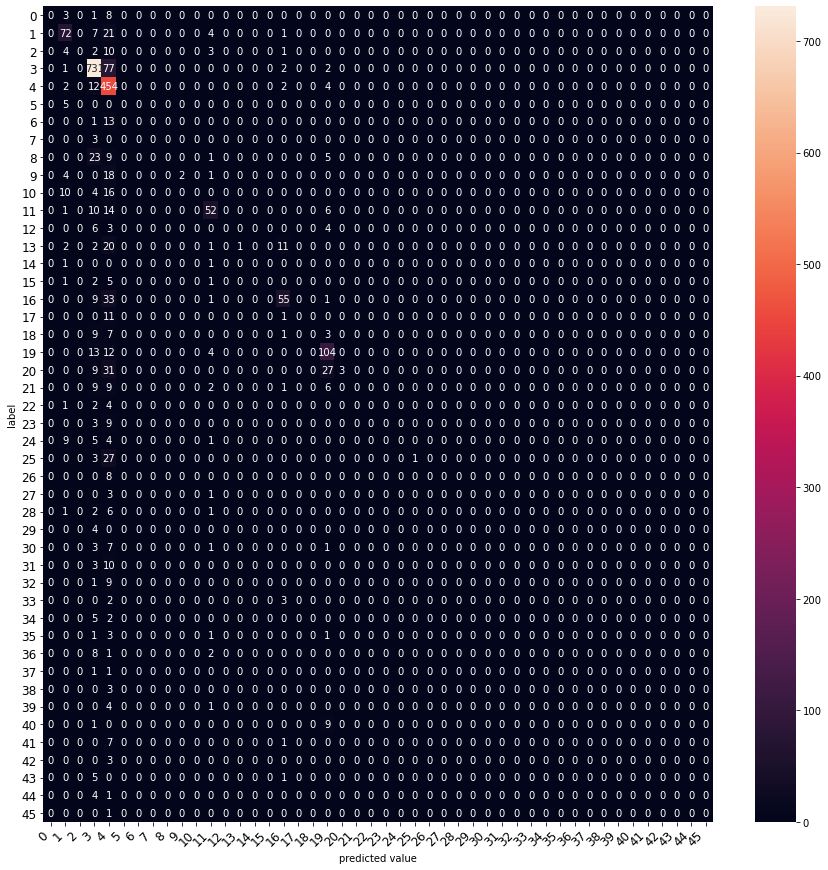

In [35]:
graph_confusion_matrix(mod, tfidfv_test, y_test)

# 컴플리먼트 나이브 베이즈 분류기 사용해보기

In [36]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [37]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


# 로지스틱 회귀(Logistic Regression)
다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 합니다. 주의할 점은 이름은 회귀지만, 실제로는 분류를 수행한다는 점입니다.
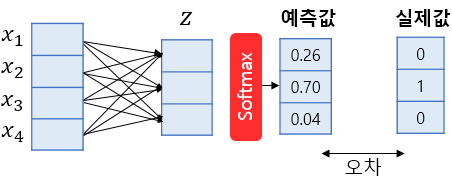

In [ ]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

In [ ]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# 선형 서포트 벡터 머신(SVM)

In [ ]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

In [ ]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# 결정 트리(Decision Tree)


In [ ]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

In [ ]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# 랜덤 포레스트(Random Forest)


In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

In [ ]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [ ]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

In [ ]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# 보팅(Voting)

In [ ]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

In [ ]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

## 프로젝트: 1. Vocabulary Size를 변경해서 시도해보기
좋은 모델을 어떻게 활용하냐도 중요하지만 그 이상으로 데이터를 어떻게 전처리 하냐는 좋은 결과물을 내는 다른 지표가 된다. 특히 BAG OF WORD기반의 데이터들은 단어장에 포함된 단어의 수가 모델의 성능의 차이를 결정짓는 파라미터가 된다. 그렇게 때문에 이번 프로젝트에서는 로이터 신문 데이터 안의 `num_words`를 조정하여 각 모델들이 어떤 차이를 보여주는지를 확인한다.

1. 단어장의 단어 갯수 조정
    - 모든 단어 사용
    - 빈도수가 상위 5000개인 단어를 사용
    - 직접 단어 갯수 설정
2. 다양한 모델을 사용하여 성능을 비교한다
    - 나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅
3. 최적의 voca사이즈와 모델을 찾는다

## 2. 딥러닝 모델과 비교하기
1. 바로 위 태스크에서 수행한 최적의 voca 값과 모델을 딥러닝 모델과 비교해본다.



In [42]:
#1. 모든 단어 활용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [43]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))
print('카테고리 : {}'.format(num_classes))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246
카테고리 : 46


In [47]:
#1. 모든 단어 활용
(x_train3, y_train3), (x_test3, y_test3) = reuters.load_data(num_words=5000, test_split=0.2)

In [49]:
print('훈련 샘플의 수: {}'.format(len(x_train3)))
print('테스트 샘플의 수: {}'.format(len(x_test3)))
print('카테고리 : {}'.format(num_classes))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246
카테고리 : 46


In [44]:
#Document Term Matrix, DTM은 사이킷런의 CountVectorizer()를 통해서 생성할 수 있습니다
dtmvector = CountVectorizer()
x_train_dtm2 = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

AttributeError: 'list' object has no attribute 'lower'